# Using the same code as before, please solve the following exercises
    3. Play around with the learning rate. Values like 0.0001, 0.001, 0.1, 1 are all interesting to observe. 
       
Useful tip: When you change something, don't forget to RERUN all cells. This can be done easily by clicking:
Kernel -> Restart & Run All
If you don't do that, your algorithm will keep the OLD values of all parameters.

## Solution

Find the piece of code that chooses the optimization algorithm. Change the learning_rate argument to 0.001.

Here are some takeaways:
1. It takes the algorithm the same time to finish working.
2. The loss is not minimized (completely).
3. The weights and biases are somewhat far from what we want them to be (we can't see that as we didn't print them).
4. More iterations are needed for this learning rate to solve the problem.
5. The problem IS NOT SOLVED.
6. The final graph looks like a 45-degree line, as the weights are almost correct.

### Import the relevant libraries

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

C:\Users\iolley2\Anaconda3\envs\py3-TF1\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\iolley2\Anaconda3\envs\py3-TF1\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\iolley2\Anaconda3\envs\py3-TF1\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\iolley2\Anaconda3\envs\py3-TF1\lib\site-packages\ten

### Data generation

We generate data using the exact same logic and code as the example from the previous notebook. The only difference now is that we save it to an npz file. Npz is numpy's file type which allows you to save numpy arrays into a single .npz file. We introduce this change because in machine learning most often: 

* you are given some data (csv, database, etc.)
* you preprocess it into a desired format (later on we will see methods for preprocesing)
* you save it into npz files (if you're working in Python) to access later

Nothing to worry about - this is literally saving your NumPy arrays into a file that you can later access, nothing more.

In [2]:

observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

## Solving with TensorFlow

<i/>Note: This intro is just the basics of TensorFlow which has way more capabilities and depth than that.<i>

In [3]:

input_size = 2
output_size = 1

### Outlining the model

In [4]:

inputs = tf.compat.v1.placeholder(tf.float32, [None, input_size])
targets = tf.compat.v1.placeholder(tf.float32, [None, output_size])

weights = tf.Variable(tf.random.uniform([input_size, output_size], minval=-0.1, maxval=0.1))
biases = tf.Variable(tf.random.uniform([output_size], minval=-0.1, maxval=0.1))

outputs = tf.matmul(inputs, weights) + biases

### Choosing the objective function and the optimization method

In [5]:

mean_loss = tf.compat.v1.losses.mean_squared_error(labels=targets, predictions=outputs) / 2.

optimize = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.001).minimize(mean_loss)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Prepare for execution

In [6]:

sess =tf.compat.v1.InteractiveSession()

### Initializing variables

In [7]:

initializer = tf.compat.v1.global_variables_initializer()

sess.run(initializer)

### Loading training data

In [8]:

training_data = np.load('TF_intro.npz')

### Learning

In [9]:

for i in range(100):
    
    _, curr_loss = sess.run([optimize, mean_loss], 
        feed_dict={inputs: training_data['inputs'], targets: training_data['targets']})
    
    print(curr_loss)

224.7182
210.81104
197.81306
185.66475
174.31047
163.69823
153.77946
144.50868
135.84348
127.7442
120.17378
113.09758
106.48323
100.300514
94.52114
89.11869
84.06848
79.347466
74.93407
70.80816
66.950905
63.344727
59.973164
56.820873
53.873478
51.117577
48.54064
46.130924
43.8775
41.77014
39.799255
37.95594
36.23182
34.619106
33.110508
31.699202
30.37882
224.7182
210.81104
197.81306
185.66475
174.31047
163.69823
153.77946
144.50868
135.84348
127.7442
120.17378
113.09758
106.48323
100.300514
94.52114
89.11869
84.06848
79.347466
74.93407
70.80816
66.950905
63.344727
59.973164
56.820873
53.873478
51.117577
48.54064
46.130924
43.8775
41.77014
39.799255
37.95594
36.23182
34.619106
33.110508
31.699202
30.37882
29.14342
27.987423
26.905638
25.893219
24.945618
24.058592
23.22818
22.450678
21.722624
21.040781
20.402128
19.803837
19.243267
18.717953
18.22559
17.764027
17.331238
16.925352
16.544607
16.187359
15.852077
15.537317
15.241746
14.964102
14.70322
14.458008
14.227435
14.01055
13.806455
1

### Plotting the data

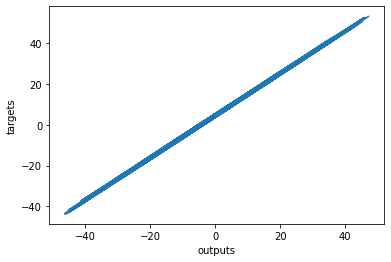

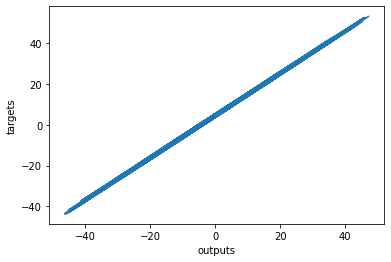

In [10]:

out = sess.run([outputs], 
               feed_dict={inputs: training_data['inputs']})

plt.plot(np.squeeze(out), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()
